## Polytope Extremes-DT Feature Extraction Trajectory example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py 

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [ ]:
import numpy as np

n = 1000
lons = np.linspace(0, 5*360, n)
lats = np.linspace(-85, 85, n)
linspace = np.stack([lats, lons], axis=1)
pts = linspace.tolist()

import earthkit.data
import earthkit.regrid

request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": "20250103",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "167",
    "step": "0",
    "feature" :{ 
        "type" : "trajectory", 
        "points" : pts, 
        "inflation" : 0.1, 
        "inflate" : "round",
        "axes" :["latitude", "longitude"], 
    },
}

#data is an earthkit streaming object but with stream=False will download data immediately 
ds = earthkit.data.from_source("polytope", "polytope", request, stream=False, address='polytope-test.lumi.apps.dte.destination-earth.eu')

In [ ]:
ds._json()

In [4]:
# Convert data to xarray
da = ds.to_xarray()
da

<xarray.Dataset> Size: 7MB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 159672)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-01-03T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) <U1 4B '0'
  * points     (points) int64 1MB 0 1 2 3 4 ... 159668 159669 159670 159671
    x          (points) float64 1MB -85.09 -85.05 -85.02 ... 85.02 85.05 85.09
    y          (points) float64 1MB 0.0 0.0 0.0 0.6164 0.0 ... 0.0 359.4 0.0 0.0
    z          (points) float64 1MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    t          (points) <U1 639kB '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0'
Data variables:
    2t         (datetimes, number, steps, points) float64 1MB 243.1 ... 253.8
Attributes:
    class:          d1
    dataset:        extremes-dt
    Forecast date:  2025-01-03T00:00:00Z
    expver:         0001
    levtype:        sfc
    step:           0
    stream:         oper
    type:           fc
    number:         0

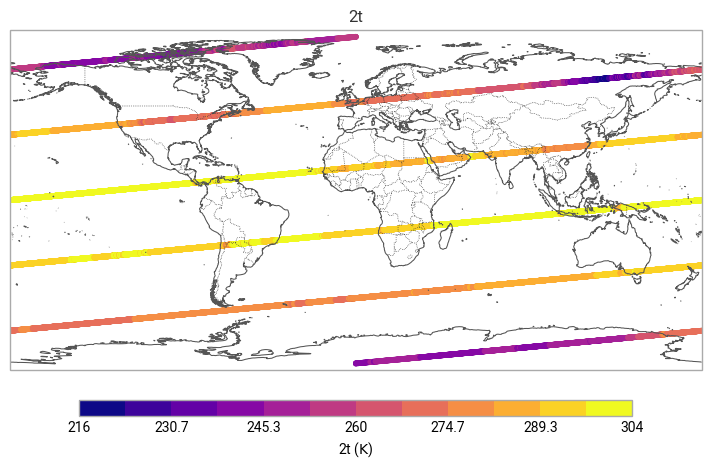

In [5]:
import earthkit.plots


chart = earthkit.plots.Map()
chart.point_cloud(da['2t'], x="y", y="x")
chart.coastlines()
chart.borders()
chart.title("{variable_name}")
chart.legend()
chart.show()